In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_train.csv")['review']
X_val = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_val.csv")['review']
X_test = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_test.csv")['review']
Z_train = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_train.csv")['rating']
Z_val = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_val.csv")['rating']
Z_test = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/X_test.csv")['rating']

y_train = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/y_train.csv")['sentiment']
y_val = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/y_val.csv")['sentiment'].reset_index(drop=True)
y_test = pd.read_csv("/content/drive/MyDrive/Thesis/dataset/y_test.csv")['sentiment'].reset_index(drop=True)

X_train = X_train.dropna()

combined_data = pd.concat([X_train, X_val, X_test])
combined_rating = pd.concat([Z_train, Z_val, Z_test])
combined_sentiment = pd.concat([y_train, y_val, y_test])

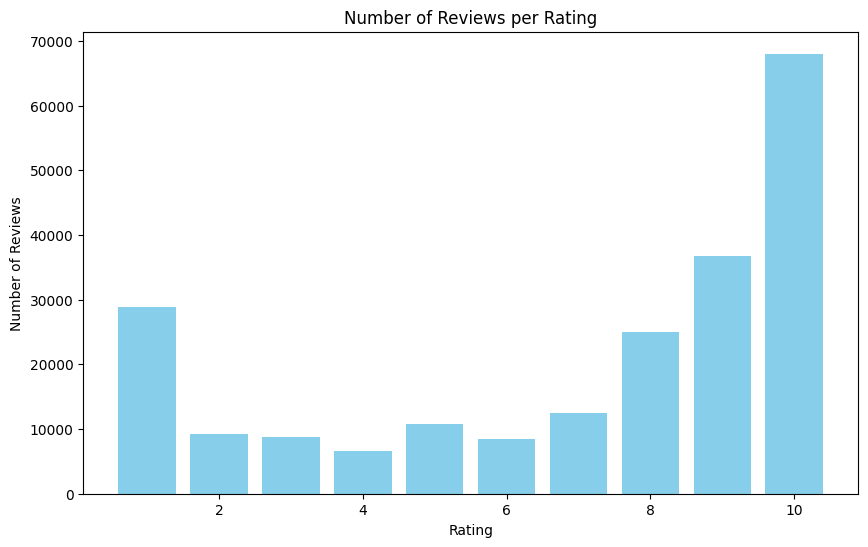

In [5]:
# Analyze number of reviews per rating
ratings_count = combined_rating.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, ratings_count.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Rating')
plt.show()

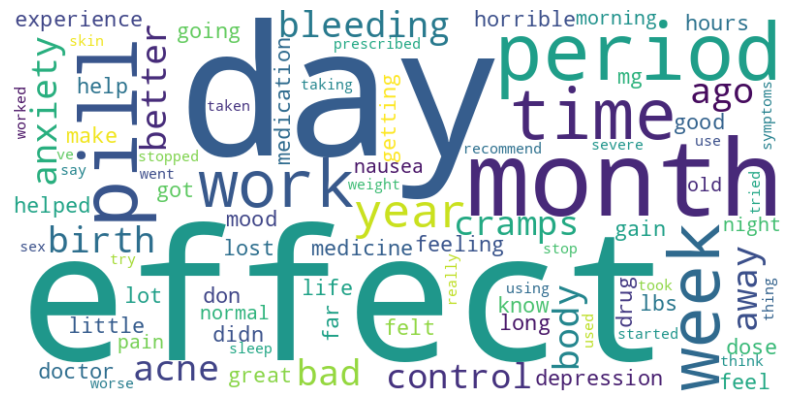

In [7]:
# Create a WordCloud of the most common words in the reviews
vectorizer = CountVectorizer(stop_words='english', max_features=100)
reviews_transformed = vectorizer.fit_transform(combined_data)
words = vectorizer.get_feature_names_out()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


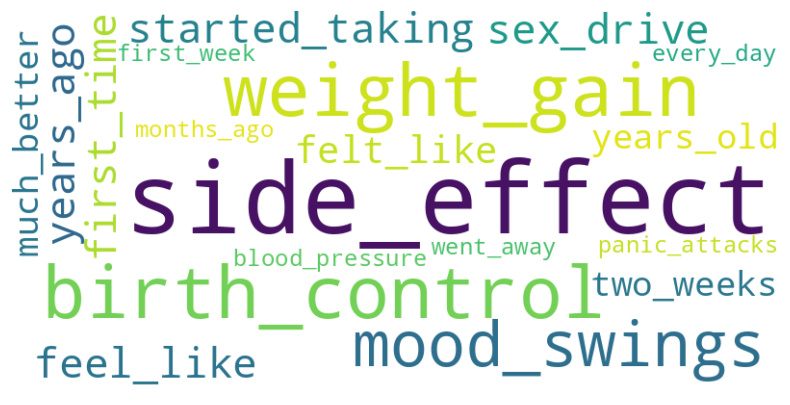

In [8]:
# Create a WordCloud of the most common pair of words in the reviews
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams

nltk.download('punkt')

X_train_tokens = X_train.apply(nltk.word_tokenize)

bigrams = X_train_tokens.apply(lambda x: list(ngrams(x, 2)))

bigrams_list = [bigram for sublist in bigrams for bigram in sublist]

bigram_freq = FreqDist(bigrams_list)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_bigrams = [bigram for bigram in bigrams_list if not any(word in ["I", "am", "#", ",", ".", "i"] + list(stop_words) for word in bigram)]

# Get frequency distribution of filtered bigrams
filtered_bigram_freq = FreqDist(filtered_bigrams)

most_common_bigrams = filtered_bigram_freq.most_common(20)

# Separate bigrams and their counts for plotting
bigrams, counts = zip(*most_common_bigrams)

bigrams_str = [" ".join(bigram) for bigram in bigrams]


# Convert list of bigrams to single string
bigrams_str = ' '.join(['_'.join(bigram) for bigram in bigrams])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(bigrams_str)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



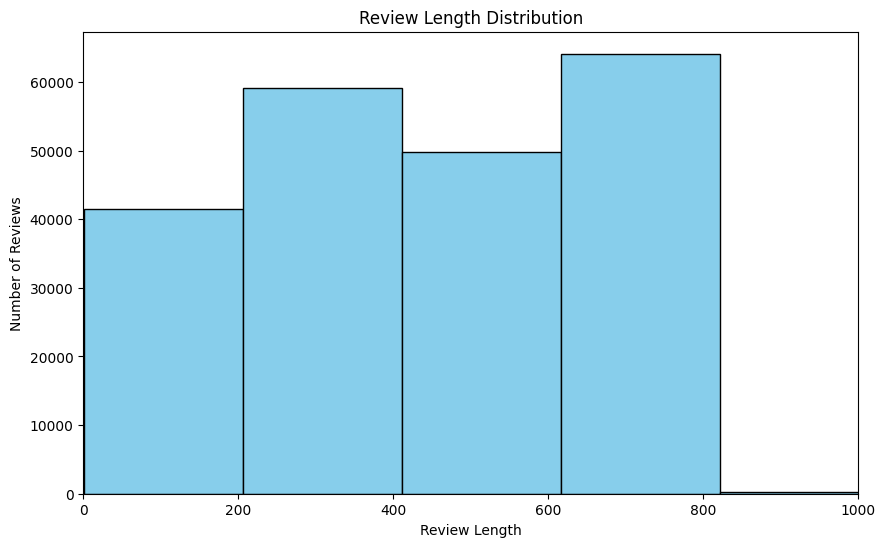

In [9]:
# Analyze review length
review_lengths = combined_data.apply(len)

plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution')
plt.xlim(0, 1000)  # Adjust x-axis range to your preference
plt.savefig('review_length_dist.png')

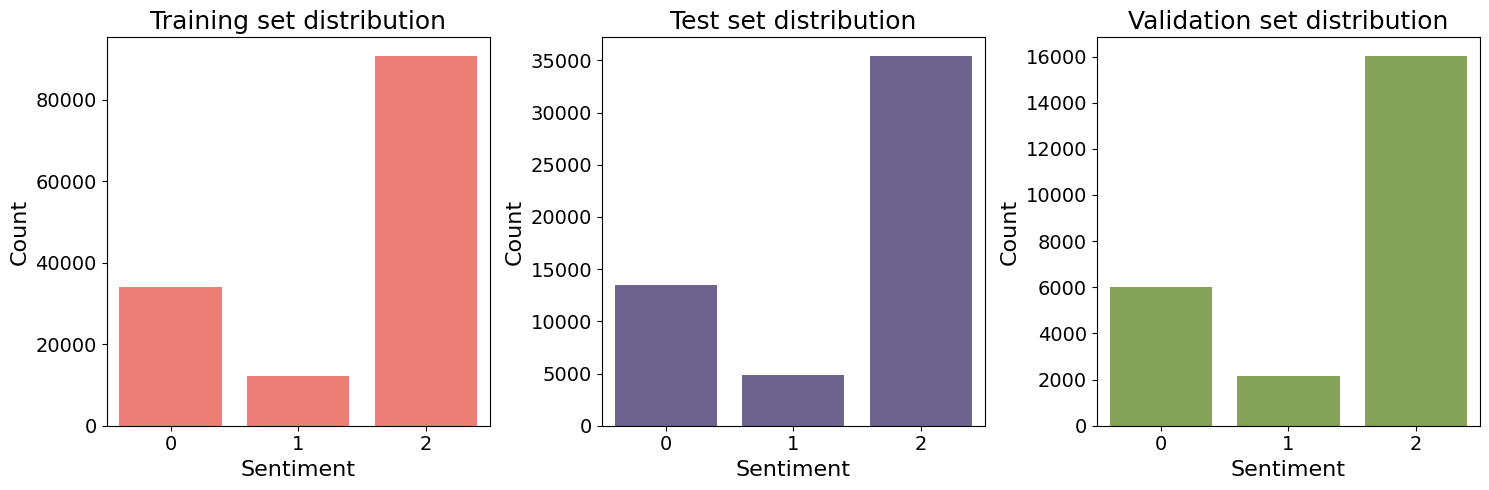

In [13]:
# Show class distribution per set
y_train_filtered = y_train[y_train.isin([0, 1, 2])]
y_test_filtered = y_test[y_test.isin([0, 1, 2])]
y_val_filtered = y_val[y_val.isin([0, 1, 2])]

color_palette = ['#FF6F61', '#6B5B95', '#88B04B']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=y_train_filtered.value_counts().index, y=y_train_filtered.value_counts(), ax=axs[0], color=color_palette[0])
axs[0].set_title("Training set distribution", fontsize=18)
axs[0].set_xlabel("Sentiment", fontsize=16)
axs[0].set_ylabel("Count", fontsize=16)
axs[0].tick_params(labelsize=14)
axs[0].set_xticks([0, 1, 2])

sns.barplot(x=y_test_filtered.value_counts().index, y=y_test_filtered.value_counts(), ax=axs[1], color=color_palette[1])
axs[1].set_title("Test set distribution", fontsize=18)
axs[1].set_xlabel("Sentiment", fontsize=16)
axs[1].set_ylabel("Count", fontsize=16)
axs[1].tick_params(labelsize=14)
axs[1].set_xticks([0, 1, 2])

sns.barplot(x=y_val_filtered.value_counts().index, y=y_val_filtered.value_counts(), ax=axs[2], color=color_palette[2])
axs[2].set_title("Validation set distribution", fontsize=18)
axs[2].set_xlabel("Sentiment", fontsize=16)
axs[2].set_ylabel("Count", fontsize=16)
axs[2].tick_params(labelsize=14)
axs[2].set_xticks([0, 1, 2])

plt.tight_layout()
plt.show()

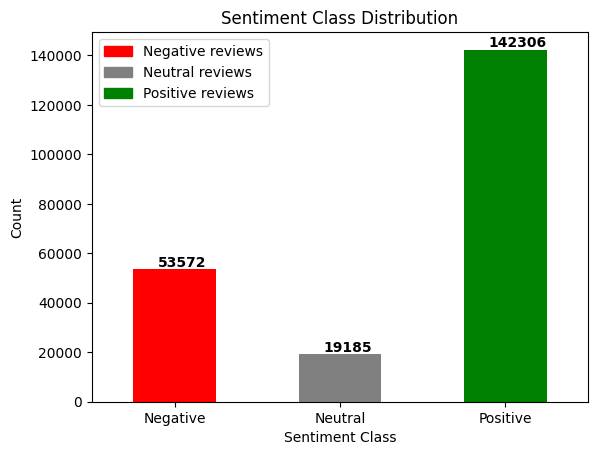

In [16]:
# Show class distribution of the whole database
class_count = combined_sentiment.value_counts().reindex([0, 1, 2])

fig, ax = plt.subplots()
class_count.plot(kind='bar', ax=ax, color=['red', 'grey', 'green'])

ax.set_title('Sentiment Class Distribution')
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Count')

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)

for i, v in enumerate(class_count):
    ax.text(i-0.1, v+1000, str(v), fontweight='bold')

labels = ['Negative reviews', 'Neutral reviews', 'Positive reviews']
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['red', 'grey', 'green']]
plt.legend(handles, labels, loc='upper left')

plt.show()